<a href="https://colab.research.google.com/github/dsingha14/algotrad/blob/main/Amzn%2Ctsla%2Cgoogl(XGBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

amazon = pd.read_csv('/content/AMZN.csv')
tesla = pd.read_csv('/content/TSLA.csv')
google = pd.read_csv('/content/GOOGL.csv')

for df in [amazon, tesla, google]:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.sort_values(by='Date', inplace=True)
    df.set_index('Date', inplace=True)

print(amazon.head())
print(tesla.head())
print(google.head())


                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
                 Open       High        Low      Close  Adj Close    Volume


In [ ]:
#amazon.isnull().sum()
#tesla.isnull().sum()
#google.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


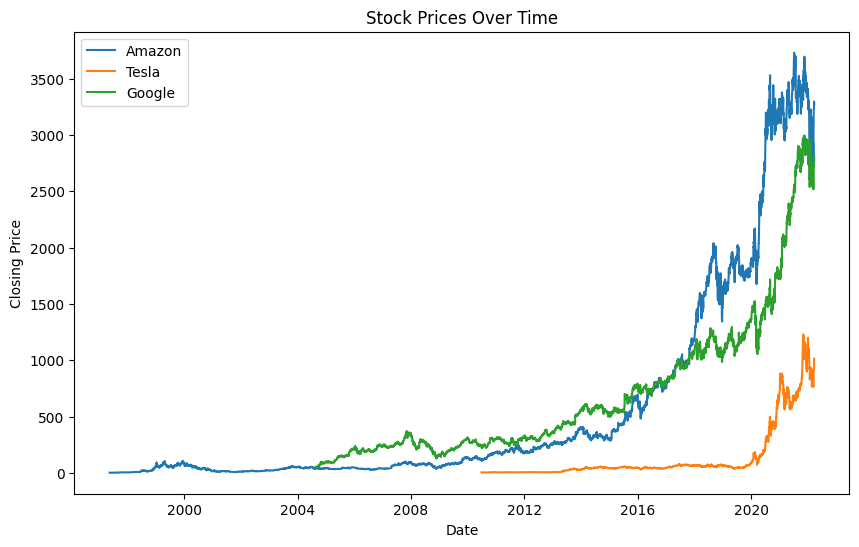

In [ ]:
# change in stock prices over time
plt.figure(figsize=(10, 6))
plt.plot(amazon.index, amazon['Close'], label='Amazon')
plt.plot(tesla.index, tesla['Close'], label='Tesla')
plt.plot(google.index, google['Close'], label='Google')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_tesla = tesla.drop(columns=['Close']) #excluding Close column (target) and including all other columns as input features
y_tesla = tesla['Close']  #our target

X_train_tes, X_test_tes, y_train_tes, y_test_tes = train_test_split(X_tesla, y_tesla, test_size=0.2, random_state=42)
#test_size=0.2: 20% of the data will be used for testing, while 80% will be used for training.
#random_state=42: producing the same split every time we run the code.


In [ ]:
model_tesla = xgb.XGBRegressor(objective='reg:squarederror')
#XGBRegressor is the XGBoost model configured for regression tasks.
#objective='reg:squarederror' specifies the regression objective function as squared error, which is commonly used for regression tasks.
#This objective minimizes the mean squared error between actual and predicted values, making it a suitable choice for predicting continuous targets like stock prices.
model_tesla.fit(X_train_tes, y_train_tes)
#.fit(X_train_tes, y_train_tes): Trains the model on the training dataset (X_train_tes for features and y_train_tes for the target). During training, the model learns patterns from the historical data that will help it predict closing prices in the test data.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_tes = model_tesla.predict(X_test_tes)
mse_tes = mean_squared_error(y_test_tes, y_pred_tes)
#calculates the Mean Squared Error (MSE) by comparing the actual closing prices
#in the test set (y_test_tes) with the predicted prices (y_pred_tes).
print(f'Tesla Mean Squared Error: {mse_tes}')


Tesla Mean Squared Error: 48.74277988758743


In [ ]:
#for amazon
X_amazon = amazon.drop(columns=['Close'])
y_amazon = amazon['Close']

# Split the data
X_train_ama, X_test_ama, y_train_ama, y_test_ama = train_test_split(X_amazon, y_amazon, test_size=0.2, random_state=42)

# Train the model
model_amazon = xgb.XGBRegressor(objective='reg:squarederror')
model_amazon.fit(X_train_ama, y_train_ama)

# Predict and evaluate
y_pred_ama = model_amazon.predict(X_test_ama)
mse_ama = mean_squared_error(y_test_ama, y_pred_ama)
print(f'Amazon Mean Squared Error: {mse_ama}')


Amazon Mean Squared Error: 203.03925825013587


In [ ]:
#for google

X_google = google.drop(columns=['Close'])
y_google = google['Close']

# Split the data
X_train_goo, X_test_goo, y_train_goo, y_test_goo = train_test_split(X_google, y_google, test_size=0.2, random_state=42)

# Train the model
model_google = xgb.XGBRegressor(objective='reg:squarederror')
model_google.fit(X_train_goo, y_train_goo)

# Predict and evaluate
y_pred_goo = model_google.predict(X_test_goo)
mse_goo = mean_squared_error(y_test_goo, y_pred_goo)
print(f'Google Mean Squared Error: {mse_goo}')


Google Mean Squared Error: 100.02556095117937


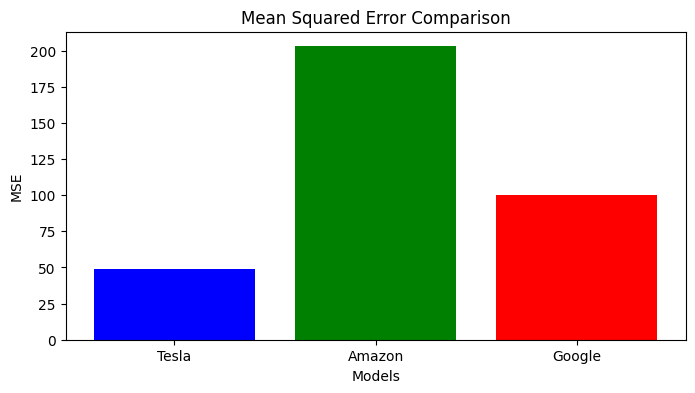

In [ ]:
import matplotlib.pyplot as plt

# MSE values
models_mse = {'Tesla': mse_tes, 'Amazon': mse_ama, 'Google': mse_goo}

# Bar plot to compare MSE values
plt.figure(figsize=(8, 4))
plt.bar(models_mse.keys(), models_mse.values(), color=['blue', 'green', 'red'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')

Hyperparameter tuning

In [ ]:
#Define Parameter Grid:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    #'colsample_bytree': [0.7, 0.8, 1.0]
}


In [ ]:
# Grid Search for Hyperparameter Tuning:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train_ama, y_train_ama)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
#Train Model with Best Parameters:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict with best model
y_pred_ama = grid_search.predict(X_test_ama)

# Calculate MSE
mse = mean_squared_error(y_test_ama, y_pred_ama)
print(f'Amazon Mean Squared Error:: {mse}')



Amazon Mean Squared Error:: 177.67862311739026


In [ ]:
#for google
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    #'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train_goo, y_train_goo)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict with best model
y_pred_goo = grid_search.predict(X_test_goo)

# Calculate MSE
mse_g = mean_squared_error(y_test_goo, y_pred_goo)
print(f'Google Mean Squared Error:: {mse_g}')

Google Mean Squared Error:: 79.25172364140634


In [ ]:
#for tesla
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    #'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=1)
grid_search.fit(X_train_tes, y_train_tes)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict with best model
y_pred_tes = grid_search.predict(X_test_tes)

# Calculate MSE
mse_t = mean_squared_error(y_test_tes, y_pred_tes)
print(f'Tesla Mean Squared Error: {mse_t}')

Tesla Mean Squared Error: 36.24330718154643


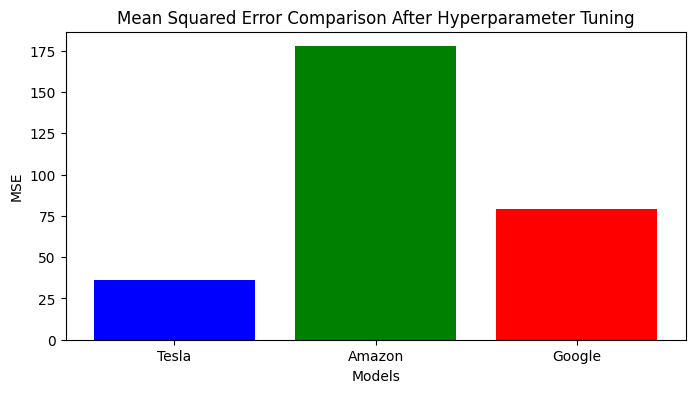

In [ ]:
import matplotlib.pyplot as plt

# MSE values
models_mse = {'Tesla': mse_t, 'Amazon': mse, 'Google': mse_g}

# Bar plot to compare MSE values
plt.figure(figsize=(8, 4))
plt.bar(models_mse.keys(), models_mse.values(), color=['blue', 'green', 'red'])
plt.title('Mean Squared Error Comparison After Hyperparameter Tuning')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.show()


In [ ]:
data = {
    ' Company': [' Amazon', ' Google', 'Tesla'],
    'Before Hyperparameter Tuning MSE': [mse_ama, mse_goo, mse_tes],
    ' After Hyperparameter Tuning MSE': [mse, mse_g, mse_t]
}

df = pd.DataFrame(data)

print(df)


   Company  Before Hyperparameter Tuning MSE   After Hyperparameter Tuning MSE
0   Amazon                        203.039258                        177.678623
1   Google                        100.025561                         79.251724
2    Tesla                         48.742780                         36.243307


In [ ]:
X_train_ama, X_val_ama, y_train_ama, y_val_ama = train_test_split(X_train_ama, y_train_ama, test_size=0.2, random_state=42)
# Initialize the model with early stopping
model_ama = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Track evaluation metrics
eval_set = [(X_train_ama, y_train_ama), (X_test_ama, y_test_ama)]
model_ama.fit(X_train_ama, y_train_ama, eval_set=[(X_train_ama, y_train_ama), (X_val_ama, y_val_ama)], verbose=True)
# Extract results
results_ama = model_ama.evals_result()
epochs = len(results_ama['validation_0']['rmse'])
x_axis = range(0, epochs)



[0]	validation_0-rmse:638.30067	validation_1-rmse:680.85880
[1]	validation_0-rmse:448.99626	validation_1-rmse:479.47104
[2]	validation_0-rmse:315.84843	validation_1-rmse:337.91824
[3]	validation_0-rmse:222.40004	validation_1-rmse:238.11844
[4]	validation_0-rmse:156.84262	validation_1-rmse:168.37958
[5]	validation_0-rmse:110.83042	validation_1-rmse:119.14253
[6]	validation_0-rmse:78.60056	validation_1-rmse:84.70788
[7]	validation_0-rmse:56.09315	validation_1-rmse:60.49831
[8]	validation_0-rmse:40.56708	validation_1-rmse:44.04539
[9]	validation_0-rmse:29.74132	validation_1-rmse:32.51530
[10]	validation_0-rmse:22.44038	validation_1-rmse:24.71872
[11]	validation_0-rmse:17.54859	validation_1-rmse:19.76032
[12]	validation_0-rmse:14.36592	validation_1-rmse:16.40877
[13]	validation_0-rmse:12.16167	validation_1-rmse:14.38806
[14]	validation_0-rmse:10.92812	validation_1-rmse:13.14091
[15]	validation_0-rmse:10.10456	validation_1-rmse:12.35614
[16]	validation_0-rmse:9.53574	validation_1-rmse:12.03

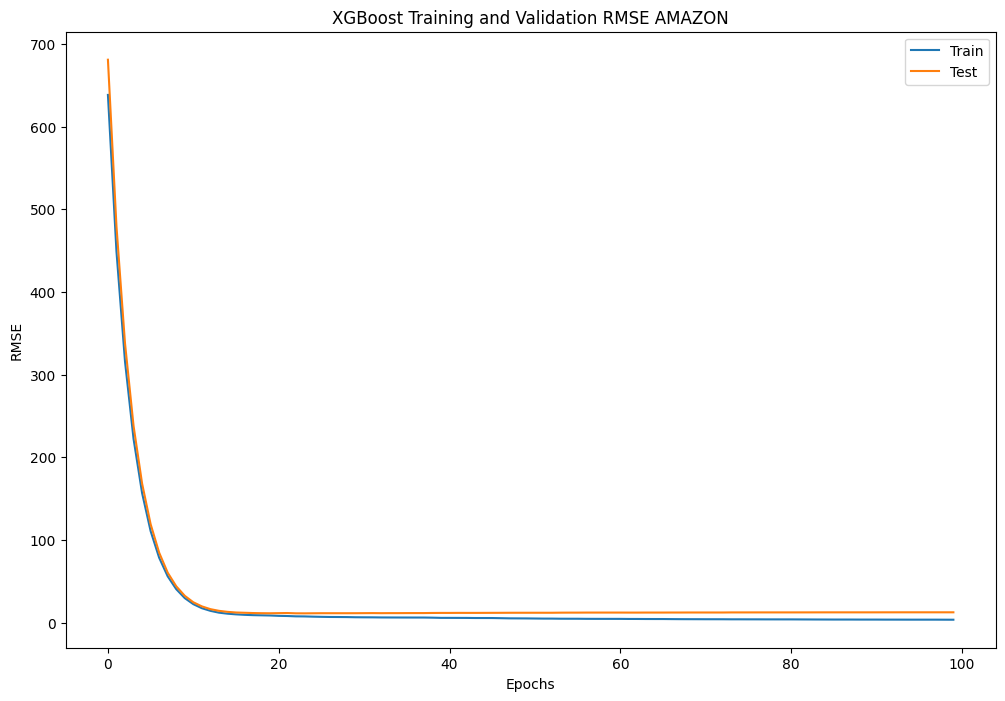

In [ ]:
# Plot training and validation curves
plt.figure(figsize=(12, 8))
plt.plot(x_axis, results_ama['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results_ama['validation_1']['rmse'], label='Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE AMAZON')
plt.show()

In [ ]:
# Assuming you have the Google data split already
X_train_goo, X_val_goo, y_train_goo, y_val_goo = train_test_split(X_train_goo, y_train_goo, test_size=0.2, random_state=42)

# Initialize the model with early stopping
model_goo = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Track evaluation metrics
eval_set = [(X_train_goo, y_train_goo), (X_test_goo, y_test_goo)]
model_goo.fit(X_train_goo, y_train_goo, eval_set=[(X_train_goo, y_train_goo), (X_val_goo, y_val_goo)], verbose=True)



[0]	validation_0-rmse:447.17574	validation_1-rmse:461.13348
[1]	validation_0-rmse:315.15044	validation_1-rmse:325.27315
[2]	validation_0-rmse:222.20438	validation_1-rmse:230.03704
[3]	validation_0-rmse:156.80852	validation_1-rmse:162.59406
[4]	validation_0-rmse:110.78695	validation_1-rmse:115.18498
[5]	validation_0-rmse:78.47432	validation_1-rmse:82.18435
[6]	validation_0-rmse:55.74485	validation_1-rmse:59.10978
[7]	validation_0-rmse:39.90133	validation_1-rmse:42.85440
[8]	validation_0-rmse:28.85575	validation_1-rmse:31.23635
[9]	validation_0-rmse:21.21073	validation_1-rmse:23.17884
[10]	validation_0-rmse:16.00116	validation_1-rmse:17.56843
[11]	validation_0-rmse:12.42289	validation_1-rmse:13.65149
[12]	validation_0-rmse:10.04764	validation_1-rmse:11.21516
[13]	validation_0-rmse:8.44768	validation_1-rmse:9.59669
[14]	validation_0-rmse:7.35393	validation_1-rmse:8.79263
[15]	validation_0-rmse:6.60196	validation_1-rmse:8.07041
[16]	validation_0-rmse:6.15789	validation_1-rmse:7.66036
[17]	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

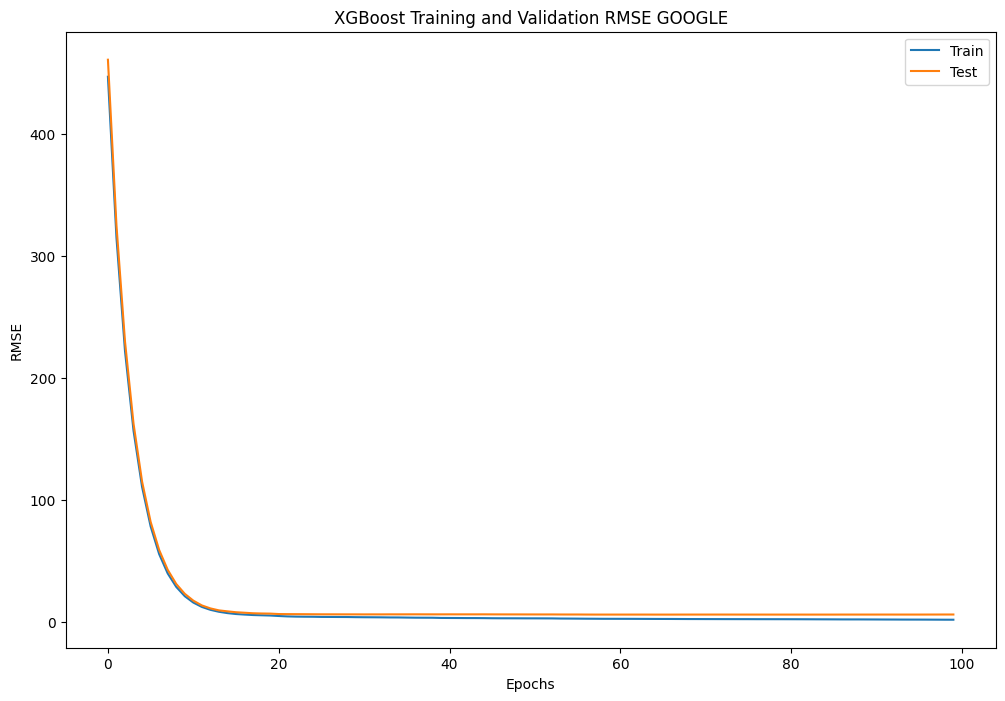

In [ ]:
# Extract results
results_goo = model_goo.evals_result()
epochs = len(results_goo['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot training and validation curves
plt.figure(figsize=(12, 8))
plt.plot(x_axis, results_goo['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results_goo['validation_1']['rmse'], label='Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE GOOGLE')
plt.show()

In [ ]:
# Assuming you have the Tesla data split already
X_train_tes, X_val_tes, y_train_tes, y_val_tes = train_test_split(X_train_tes, y_train_tes, test_size=0.2, random_state=42)

# Initialize the model with early stopping
model_tes = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Track evaluation metrics
eval_set = [(X_train_tes, y_train_tes), (X_test_tes, y_test_tes)]
model_tes.fit(X_train_tes, y_train_tes, eval_set=[(X_train_tes, y_train_tes), (X_val_tes, y_val_tes)], verbose=True)



[0]	validation_0-rmse:179.74550	validation_1-rmse:171.15905
[1]	validation_0-rmse:127.19795	validation_1-rmse:120.59040
[2]	validation_0-rmse:90.12503	validation_1-rmse:85.14134
[3]	validation_0-rmse:63.95517	validation_1-rmse:59.65836
[4]	validation_0-rmse:45.47665	validation_1-rmse:42.24326
[5]	validation_0-rmse:32.44559	validation_1-rmse:30.01431
[6]	validation_0-rmse:23.25343	validation_1-rmse:21.37186
[7]	validation_0-rmse:16.81701	validation_1-rmse:15.06860
[8]	validation_0-rmse:12.31861	validation_1-rmse:11.08963
[9]	validation_0-rmse:9.21836	validation_1-rmse:8.37377
[10]	validation_0-rmse:7.06649	validation_1-rmse:6.69232
[11]	validation_0-rmse:5.59840	validation_1-rmse:5.48052
[12]	validation_0-rmse:4.56210	validation_1-rmse:4.86203
[13]	validation_0-rmse:3.84409	validation_1-rmse:4.39805
[14]	validation_0-rmse:3.29199	validation_1-rmse:4.26542
[15]	validation_0-rmse:2.87855	validation_1-rmse:4.14355
[16]	validation_0-rmse:2.59321	validation_1-rmse:4.07681
[17]	validation_0-r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

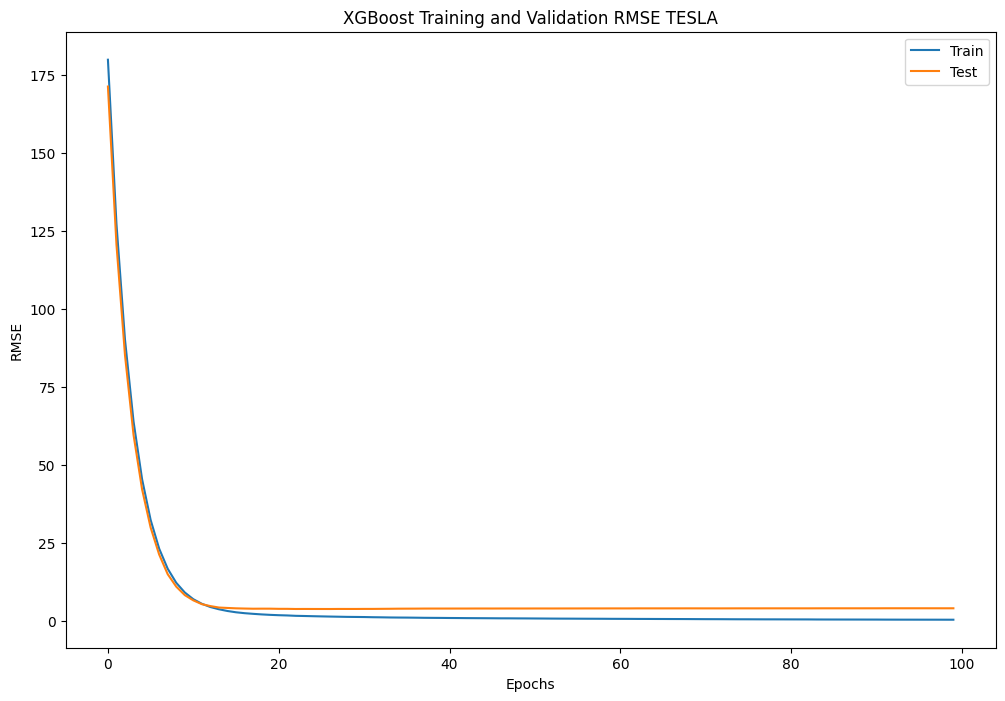

In [ ]:
# Extract results
results_tes = model_tes.evals_result()
epochs = len(results_tes['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plot training and validation curves
plt.figure(figsize=(12, 8))
plt.plot(x_axis, results_tes['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results_tes['validation_1']['rmse'], label='Test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE TESLA')
plt.show()

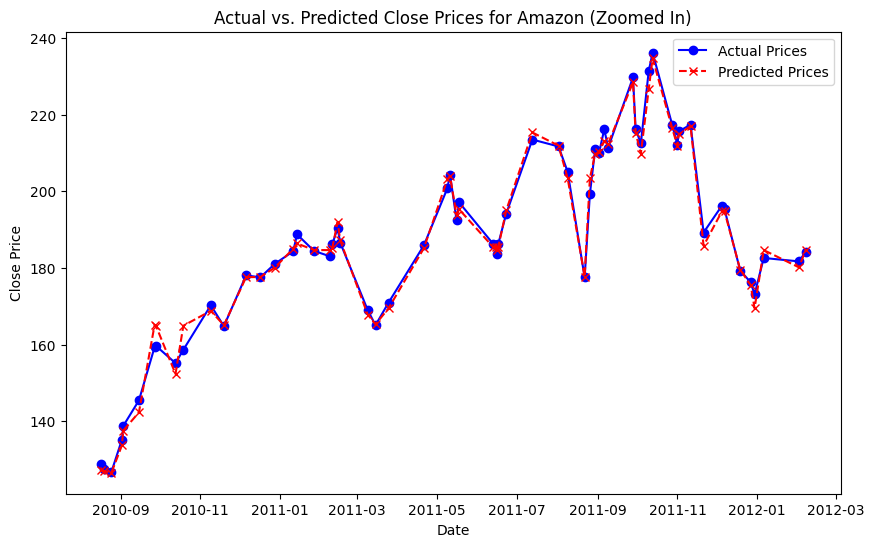

In [ ]:
X_val_ama['Date'] = pd.to_datetime(X_val_ama.index)
X_val_ama = X_val_ama.set_index('Date')

# Sort the validation data by date
X_val_sorted_ama = X_val_ama.sort_index()

# Similarly sort y_val to maintain the same order
y_val_sorted_ama = y_val_ama.sort_index()

# Define a specific date range
start_date = '2010-08-13'
end_date = '2012-02-07'

# Filter validation data for the specified date range
y_val_zoomed_ama = y_val_sorted_ama.loc[start_date:end_date]
X_val_zoomed_ama = X_val_sorted_ama.loc[start_date:end_date]

# Predict with the fitted model
y_val_pred_zoomed_ama = model_ama.predict(X_val_zoomed_ama)

# Plot Actual vs Predicted prices for the zoomed-in period
plt.figure(figsize=(10, 6))
plt.plot(y_val_zoomed_ama.index, y_val_zoomed_ama, label='Actual Prices', color='blue', marker='o')
plt.plot(y_val_zoomed_ama.index, y_val_pred_zoomed_ama, label='Predicted Prices', color='red', linestyle='dashed', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices for Amazon (Zoomed In)')
plt.legend()
plt.show()


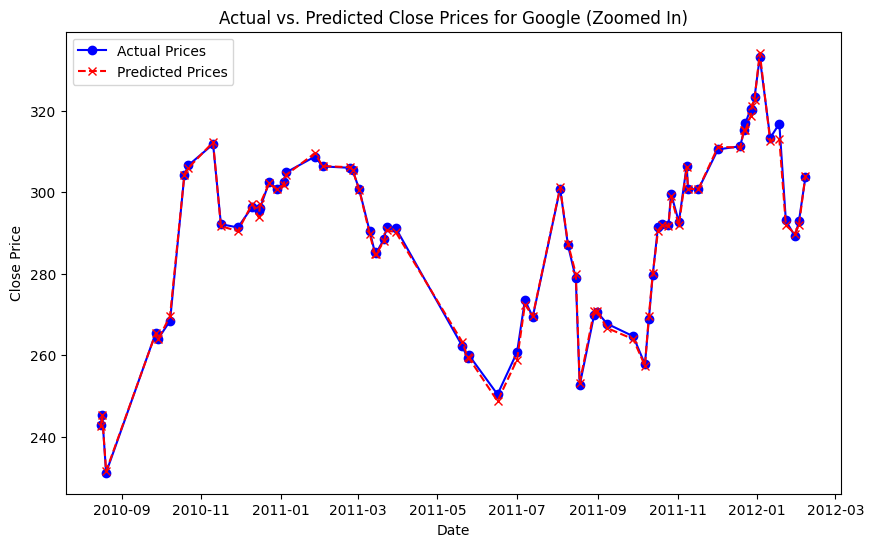

In [ ]:
X_val_goo['Date'] = pd.to_datetime(X_val_goo.index)
X_val_goo = X_val_goo.set_index('Date')

# Sort the validation data by date
X_val_sorted_goo = X_val_goo.sort_index()

# Similarly sort y_val to maintain the same order
y_val_sorted_goo = y_val_goo.sort_index()

# Define a specific date range
start_date = '2010-08-13'
end_date = '2012-02-07'

# Filter validation data for the specified date range
y_val_zoomed_goo = y_val_sorted_goo.loc[start_date:end_date]
X_val_zoomed_goo = X_val_sorted_goo.loc[start_date:end_date]

# Predict with the fitted model
y_val_pred_zoomed_goo = model_goo.predict(X_val_zoomed_goo)

# Plot Actual vs Predicted prices for the zoomed-in period
plt.figure(figsize=(10, 6))
plt.plot(y_val_zoomed_goo.index, y_val_zoomed_goo, label='Actual Prices', color='blue', marker='o')
plt.plot(y_val_zoomed_goo.index, y_val_pred_zoomed_goo, label='Predicted Prices', color='red', linestyle='dashed', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices for Google (Zoomed In)')
plt.legend()
plt.show()


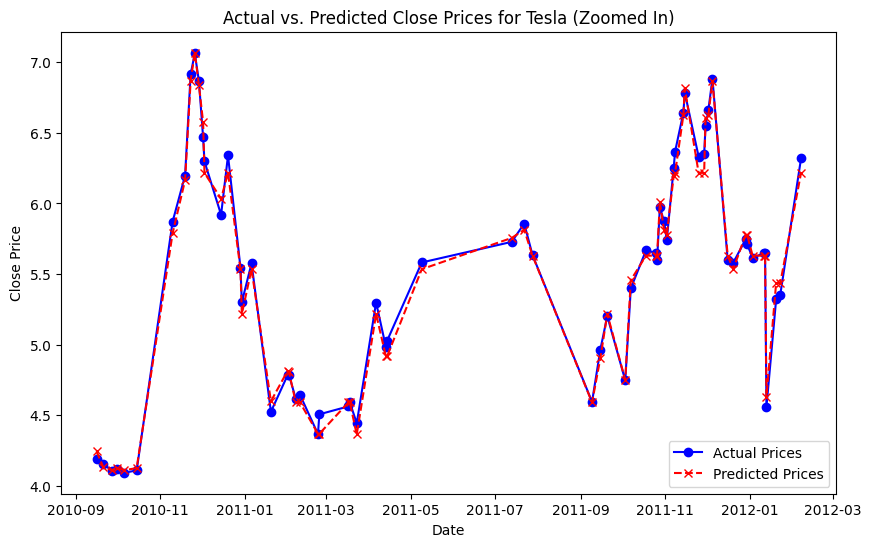

In [ ]:
X_val_tes['Date'] = pd.to_datetime(X_val_tes.index)
X_val_tes = X_val_tes.set_index('Date')

# Sort the validation data by date
X_val_sorted_tes = X_val_tes.sort_index()

# Similarly sort y_val to maintain the same order
y_val_sorted_tes = y_val_tes.sort_index()

# Define a specific date range
start_date = '2010-08-13'
end_date = '2012-02-07'

# Filter validation data for the specified date range
y_val_zoomed_tes = y_val_sorted_tes.loc[start_date:end_date]
X_val_zoomed_tes = X_val_sorted_tes.loc[start_date:end_date]

# Predict with the fitted model
y_val_pred_zoomed_tes = model_tes.predict(X_val_zoomed_tes)

# Plot Actual vs Predicted prices for the zoomed-in period
plt.figure(figsize=(10, 6))
plt.plot(y_val_zoomed_tes.index, y_val_zoomed_tes, label='Actual Prices', color='blue', marker='o')
plt.plot(y_val_zoomed_tes.index, y_val_pred_zoomed_tes, label='Predicted Prices', color='red', linestyle='dashed', marker='x')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices for Tesla (Zoomed In)')
plt.legend()
plt.show()


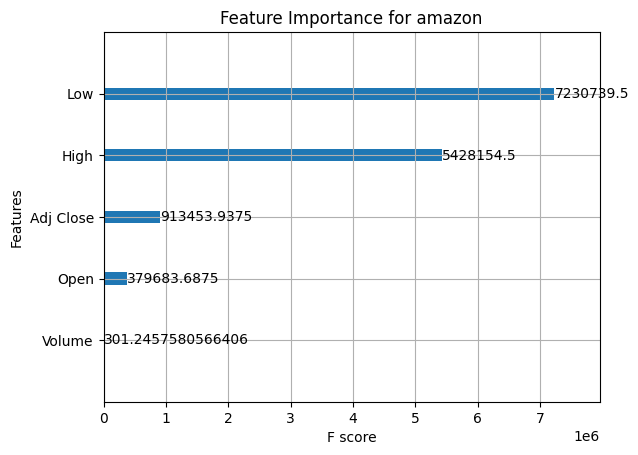

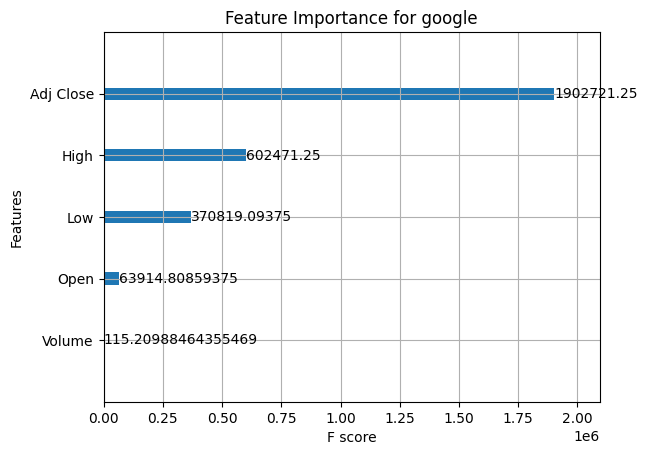

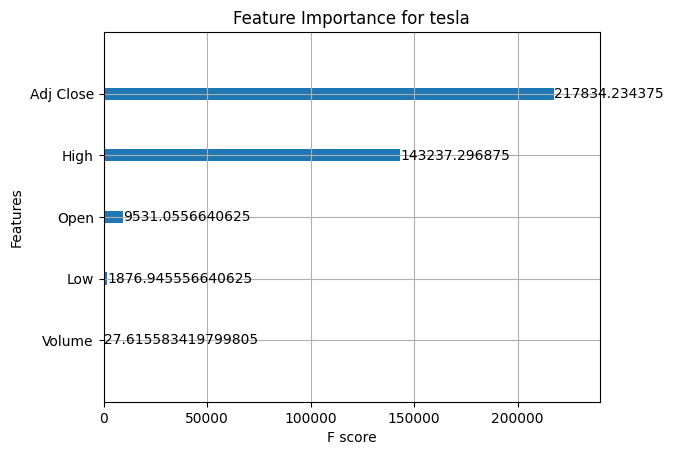

In [ ]:
xgb.plot_importance(model_ama, importance_type='gain', max_num_features=10)
plt.title("Feature Importance for amazon")
plt.show()
xgb.plot_importance(model_goo, importance_type='gain', max_num_features=10)
plt.title("Feature Importance for google")
plt.show()
xgb.plot_importance(model_tes, importance_type='gain', max_num_features=10)
plt.title("Feature Importance for tesla")
plt.show()